# Random Forests Model Grid Search

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Modules:" data-toc-modified-id="Import-Modules:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Modules:</a></span></li><li><span><a href="#Import-Data:" data-toc-modified-id="Import-Data:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data:</a></span></li><li><span><a href="#Set-up-Model-and-Gridsearch:" data-toc-modified-id="Set-up-Model-and-Gridsearch:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Set up Model and Gridsearch:</a></span></li><li><span><a href="#Run-the-Gridsearche:" data-toc-modified-id="Run-the-Gridsearche:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Run the Gridsearche:</a></span></li><li><span><a href="#Save-the-Gridsearch:" data-toc-modified-id="Save-the-Gridsearch:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save the Gridsearch:</a></span></li><li><span><a href="#Analyse-Gridsearch-Results:" data-toc-modified-id="Analyse-Gridsearch-Results:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analyse Gridsearch Results:</a></span></li><li><span><a href="#Analyse-Classification-Scores:" data-toc-modified-id="Analyse-Classification-Scores:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Analyse Classification Scores:</a></span></li></ul></div>

### Import Modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import scikitplot as skplt

### Import Data:

In [3]:
# Filepaths / names:
y1_train_file = '../Data/y1_train_clean_processed.csv'
y1_test_file = '../Data/y1_test_clean_processed.csv'
X1_train_file = '../Data/X1_train_clean_processed.csv'
X1_test_file = '../Data/X1_test_clean_processed.csv'

In [4]:
y1_train = pd.read_csv(y1_train_file)

In [5]:
y1_test = pd.read_csv(y1_test_file)

In [6]:
X1_train = pd.read_csv(X1_train_file)

In [7]:
X1_test = pd.read_csv(X1_test_file)

### Set up Model and Gridsearch:

In [8]:
model5 = RandomForestClassifier()

In [9]:
params5 = {'n_estimators': [10,20,30],
          'criterion': ['gini'],# 'entropy'],
          'max_depth': [None,5,15],
          'bootstrap': [False],
          'max_samples':[0.5]}

In [10]:
gs_model5 = GridSearchCV(estimator=model5,
                   param_grid=params5,
                   cv=5,
                   scoring='f1_macro',
                   n_jobs=-2,
                   return_train_score=True,verbose=6)

### Run the Gridsearche:

In [11]:
gs_model5.fit(X1_train, y1_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  32 out of  45 | elapsed: 40.2min remaining: 16.3min
[Parallel(n_jobs=-2)]: Done  40 out of  45 | elapsed: 43.2min remaining:  5.4min
[Parallel(n_jobs=-2)]: Done  45 out of  45 | elapsed: 49.9min finished
C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None, 5, 15], 'max_samples': [0.5],
                         'n_estimators': [10, 20, 30]},
             return_train_score=True, scoring='f1_macro', verbose=6)

### Save the Gridsearch:

In [12]:
joblib.dump(gs_model5, '../Model_Save_Files/Random_Forest_Grid_Search_5b.jlib')

['../Model_Save_Files/Random_Forest_Grid_Search_5b.jlib']

### Analyse Gridsearch Results:

In [13]:
print(gs_model5.best_estimator_)
print(gs_model5.best_score_)
print(gs_model5.score(X1_train, y1_train))

RandomForestClassifier(bootstrap=False, max_depth=15, max_samples=0.5,
                       n_estimators=30)
0.8337049296912676
0.8431982589073015


In [14]:
gs_model5.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 15,
 'max_samples': 0.5,
 'n_estimators': 30}

### Analyse Classification Scores:

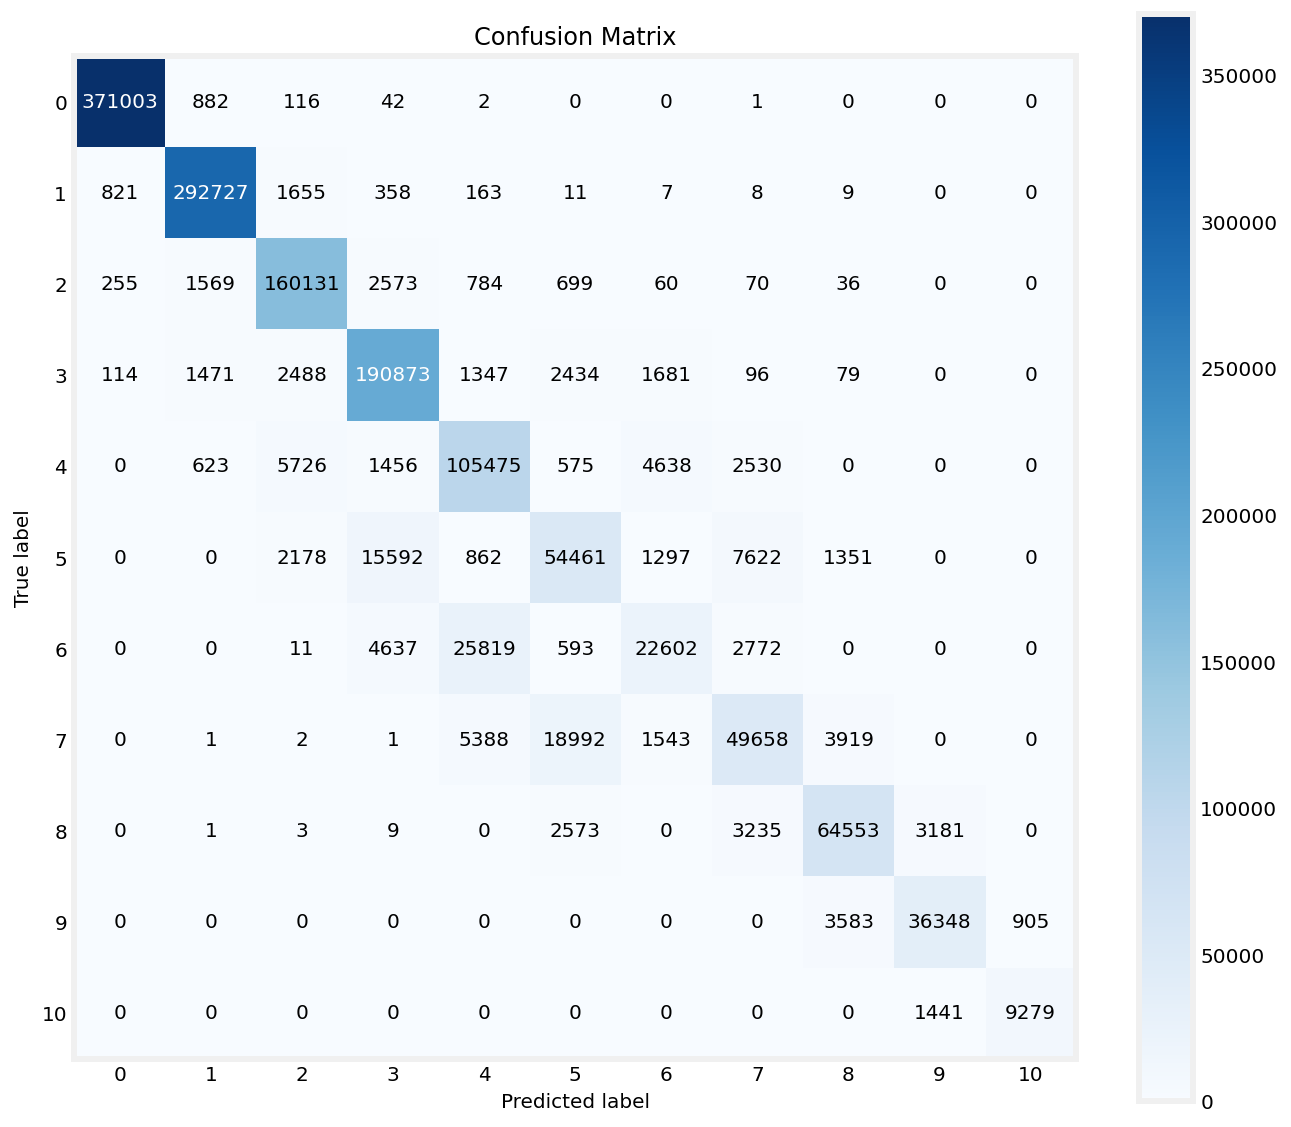

In [15]:
# Confusion Matrix
best_RF = gs_model5.best_estimator_
predictions_test5 = best_RF.predict(X1_test)

skplt.metrics.plot_confusion_matrix(y1_test,predictions_test5,labels=[0,1,2,3,4,5,6,7,8,9,10],figsize=(10,10))
plt.show()

In [16]:
# Cross Validation Score
cvs5 = cross_val_score(best_RF, X1_test, y1_test, cv=5)
print(cvs5.mean())

C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

0.9043133333333333


In [17]:
# Accuracy, Precision and Recall
predictions_train5 = best_RF.predict(X1_train)

print(classification_report(y1_train, predictions_train5))
print(classification_report(y1_test, predictions_test5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    868106
           1       0.99      0.99      0.99    690106
           2       0.94      0.98      0.96    387747
           3       0.89      0.96      0.93    468026
           4       0.76      0.88      0.82    282387
           5       0.69      0.67      0.68    194514
           6       0.74      0.42      0.53    131678
           7       0.76      0.63      0.69    185511
           8       0.88      0.88      0.88    171628
           9       0.90      0.90      0.90     95284
          10       0.92      0.87      0.90     25013

    accuracy                           0.91   3500000
   macro avg       0.86      0.84      0.84   3500000
weighted avg       0.91      0.91      0.91   3500000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    372046
           1       0.98      0.99      0.99    295759
           2       0.93 

In [18]:
# Precision Recall and ROC Curves
probabilities5_train = best_RF.predict_proba(X1_train)
probabilities5_test = best_RF.predict_proba(X1_test)

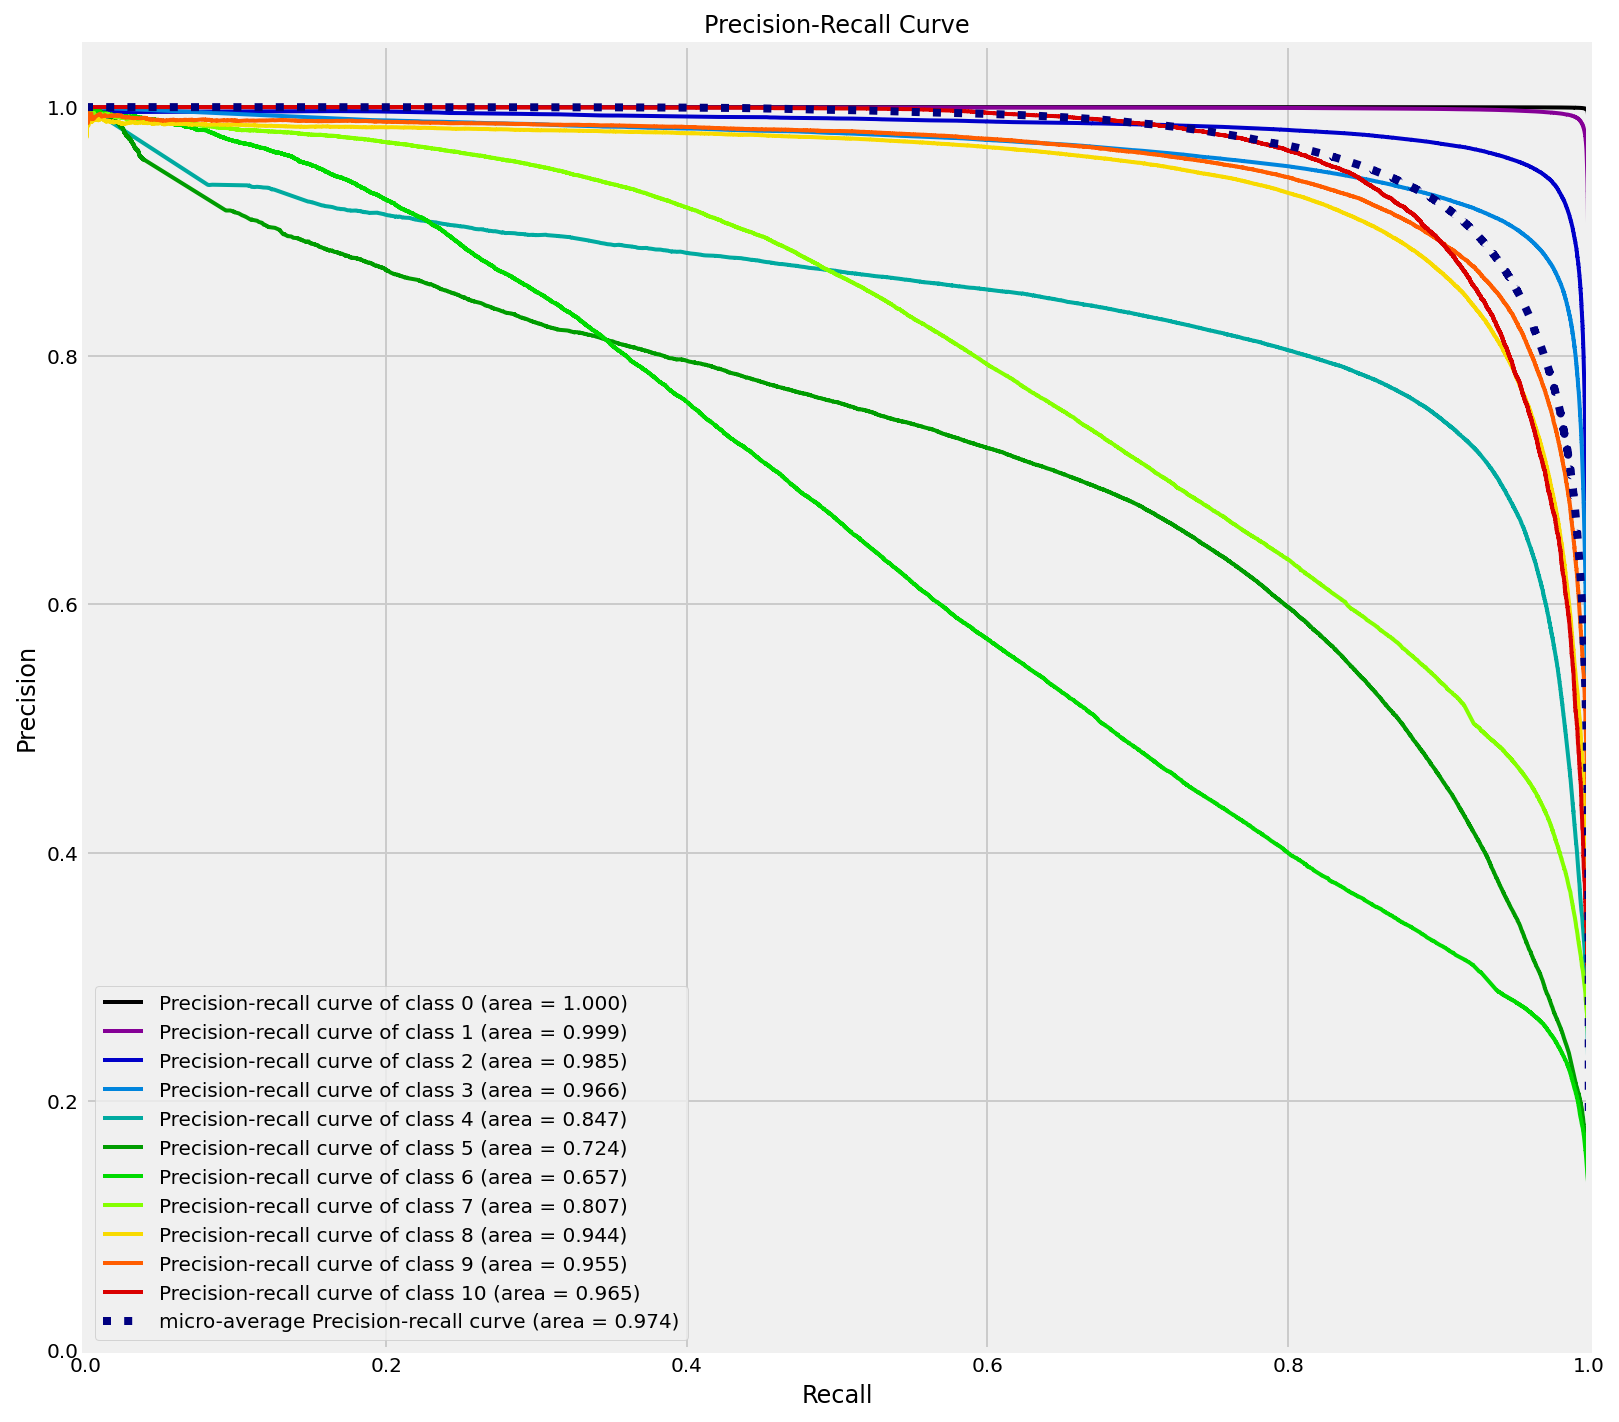

In [19]:
skplt.metrics.plot_precision_recall(y1_train, probabilities5_train,figsize=(12,12))
plt.show()

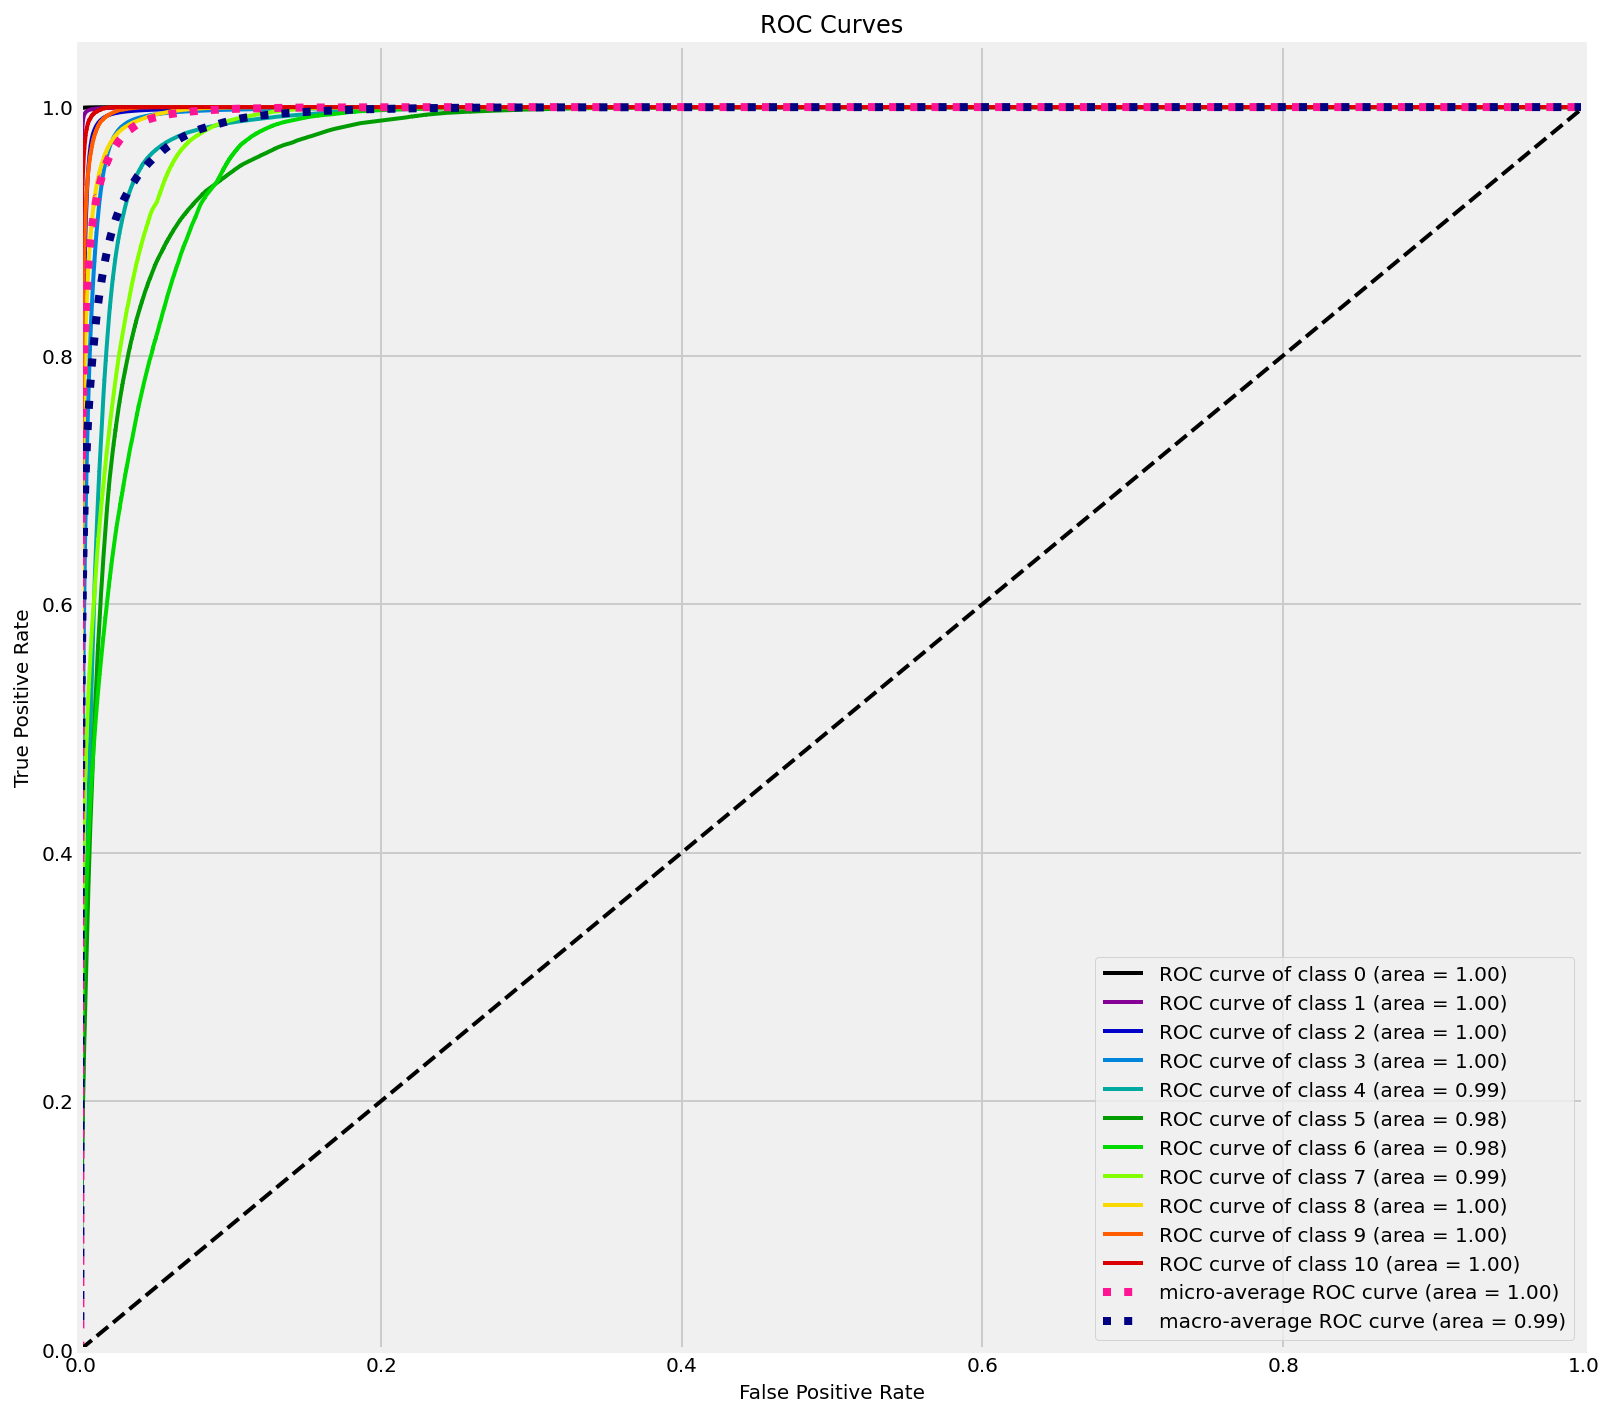

In [20]:
skplt.metrics.plot_roc(y1_train, probabilities5_train,figsize=(12,12))
plt.show()

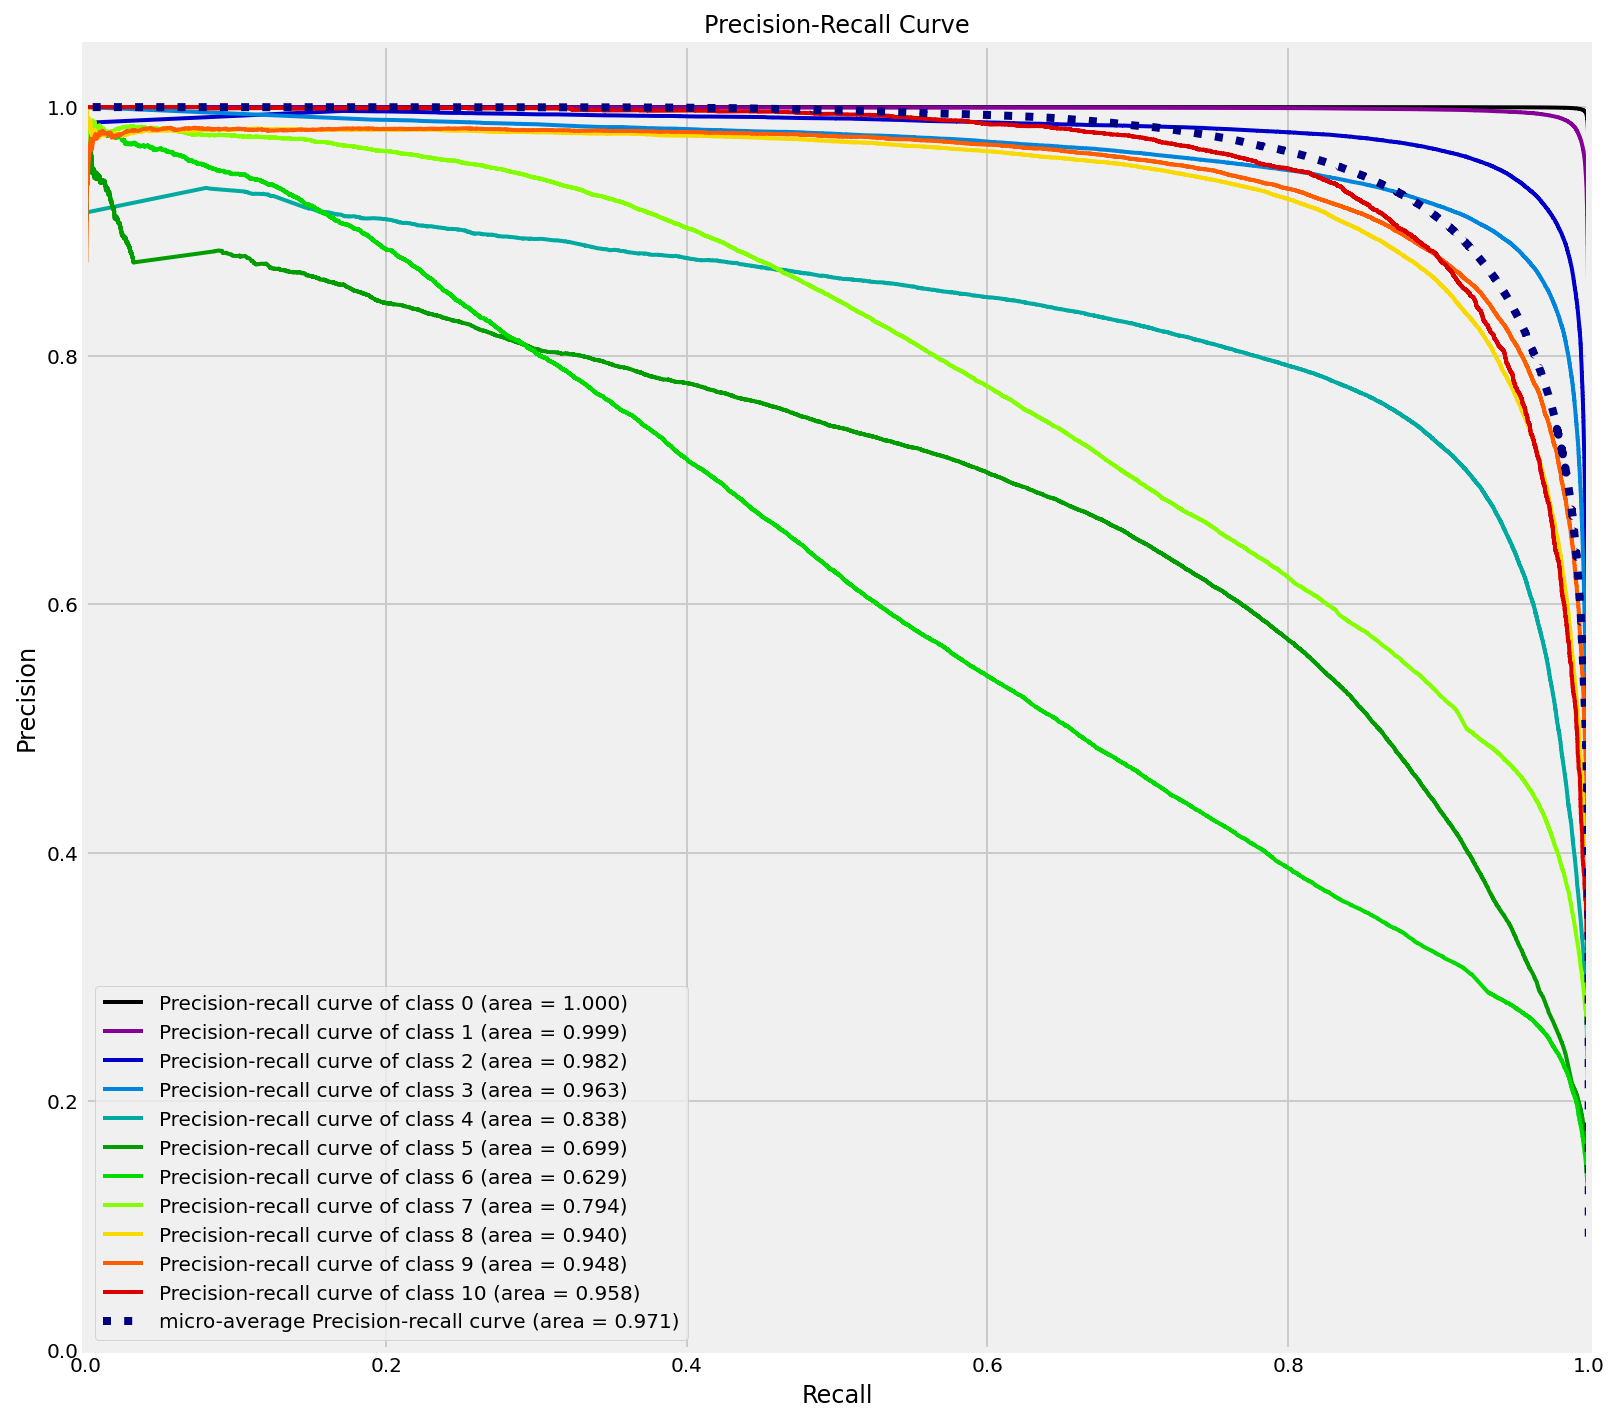

In [21]:
skplt.metrics.plot_precision_recall(y1_test, probabilities5_test,figsize=(12,12))
plt.show()

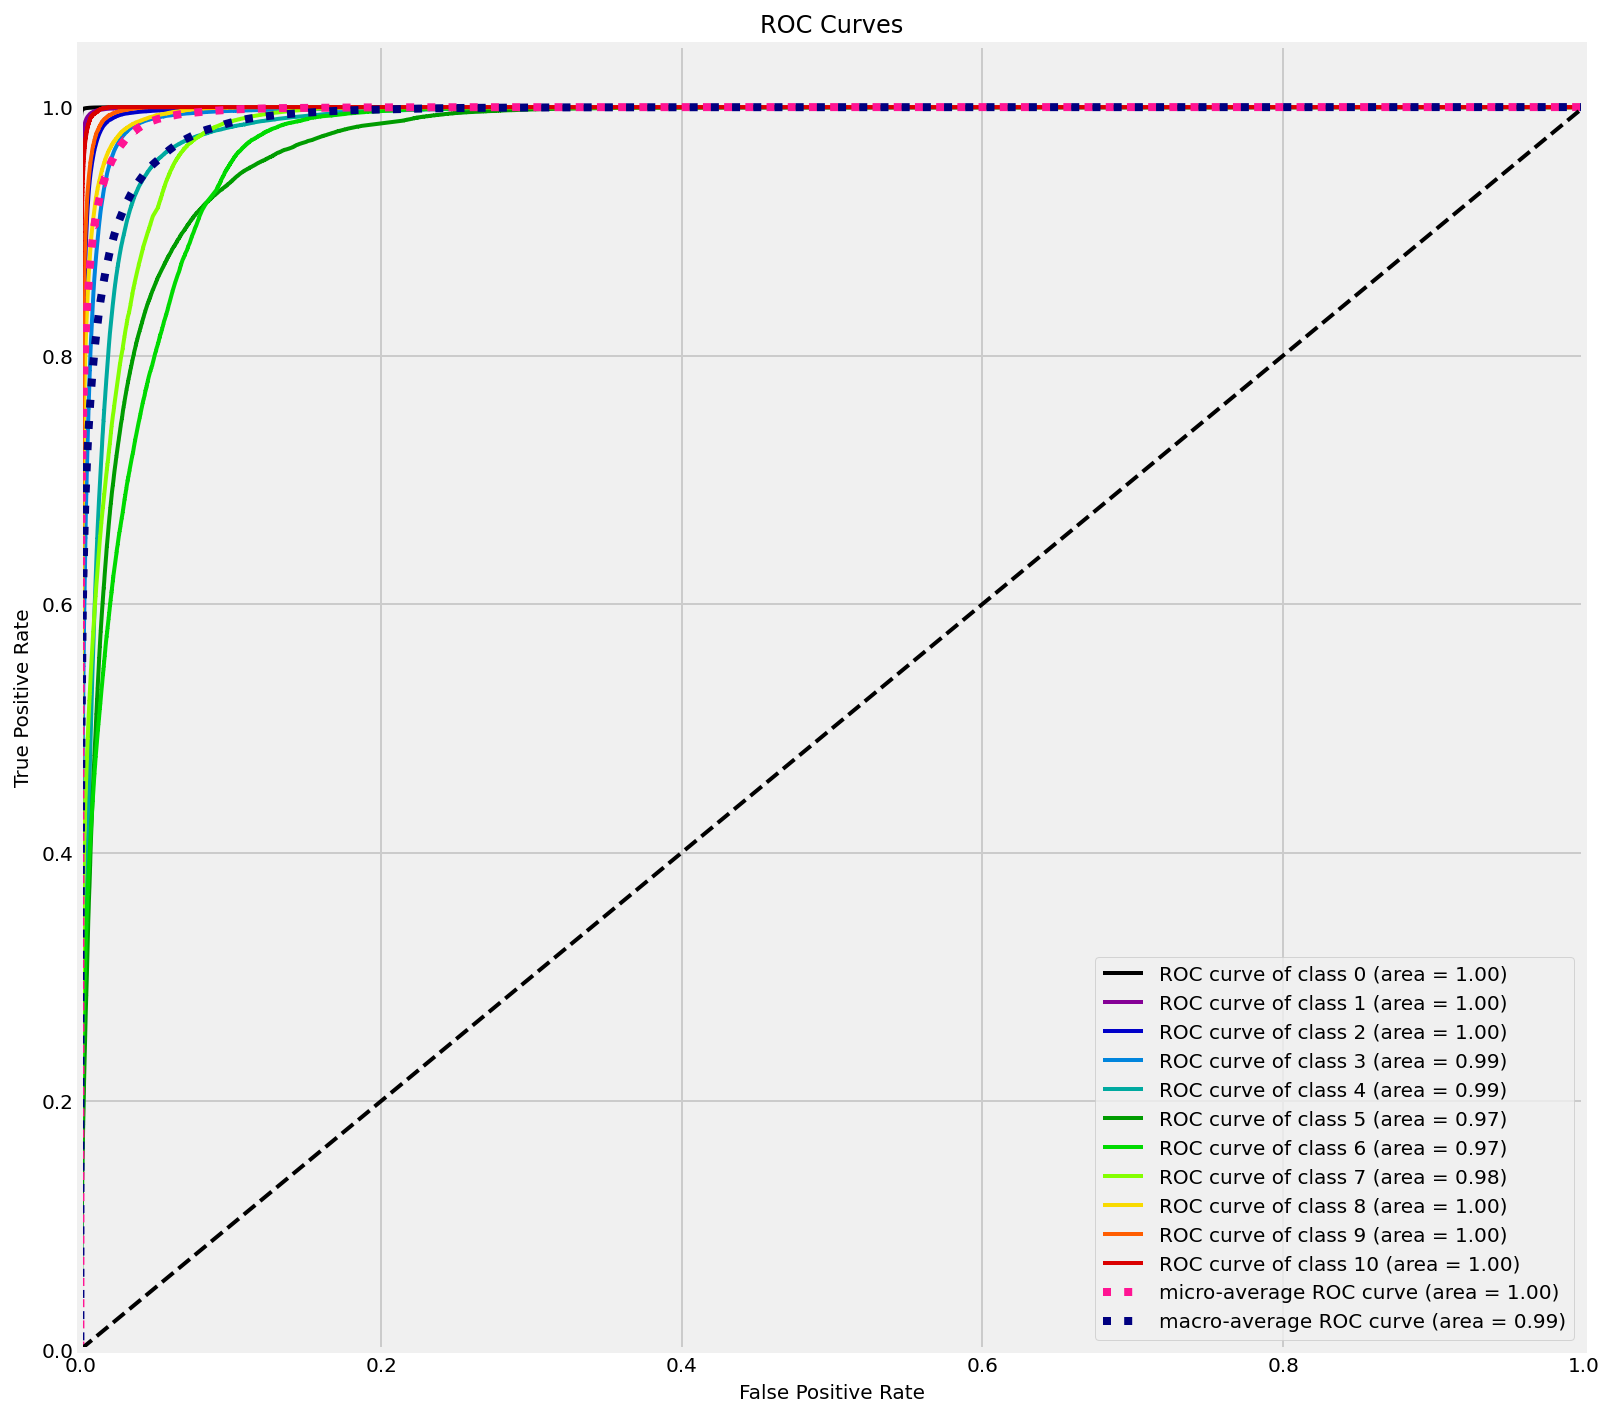

In [22]:
skplt.metrics.plot_roc(y1_test, probabilities5_test,figsize=(12,12))
plt.show()